## Import Libraries

In [184]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

SEED = 42

## Load and view data

In [185]:
path = 'data/ai-medical-chatbot-data.csv'
df = pd.read_csv(path)

In [186]:
df.sample(5, random_state=SEED)

,short_question,short_answer,tags,label
30265,what is a nervous breakdown,nervous breakdown is not a clinical term so it does not mean anything specific to doctors people may use nervous breakdown to describe an episode of severe emotional distress the word “breakdown” may suggest the person showed unusual behavior or stopped performing his or her expected duties at home or work people described as having a nervous breakdown may or may not meet the criteria for a formal psychiatric diagnosis,['mental breakdown'],1.0
24640,i get very paranoid about allergies and death please help,do not be so obsessive about it in last 20 years i have hardly seen any case of anaphylaxis due to allergy its that rare so calm down you wont get anaphylaxis,['paranoia'],1.0
13125,my husband took a 25 mg imitrex for a really bad headache over three hours ago can he also take vicodin,hi start with the ringing well that could be tinnitus have a look on www earthclnic com its all natural stuff you may find some help there if you think you ears are clogged try some warm olive oil in them its worked for me a couple of times as fore smoking did smoke form the age of 11 till 1996 have just resently had a bit of tinnitus but i put this down to using a cutting disc next to my head as i was up a ladder your find tinnitus comes from lots of things load music in ear phones being the worst do hope this helps you good luck,['headache' 'vitamin a'],-1.0
41494,my wife is 72 and was diagnosed with afib 3 years ago is it advisable for her to be on a statin medication now her health has been good in general except for age related issues like arthritis and some hearing loss she has never had any heart problems before the afib never any high blood pressure high cholesterol or anything else her last cholesterol level was 186 triglyceride 128 hdl 68 non hdl cholesterol 118 and ldl 92 i would like to know what the recommendation is for a person with this profile should they be taking a statin medication as a prophylactic measure,hi her numbers are good and keep as far away from statins as she can get she sounds really healthy statins could reverse that if your not up on statins just go to www spacdoc com its a site all by doctors even the site owner is a doctor makes for some very interesting reading ok good luck,['arthritis' 'hearing loss' 'heart' 'high blood pressure' 'cholesterol'],1.0
29503,im having lower back pains and im having pains in my pelvic area and i am leaking urine for no reason i have to use the restroom about every hour i feel sick every time i wake up i have no idea whats going on i have never had a kid before i dont know what kind of doctor i need to see,mupiricin is an antibiotic used for skin infections it will not help poison ivy sorry,['pelvic area' 'nausea' 'vision' 'pain' 'back pain'],-1.0


#### Convert the tags column from string to list

In [187]:
def convert_col_to_list(df : pd.DataFrame, column_name : str) -> pd.DataFrame:
	
	# Iterate through each row in the DataFrame
	for i in range(len(df)):  
		value = df.at[i, column_name]
		
		# Remove square brackets from the string (if present)
		value_without_brackets = value.replace('[', '').replace(']', '')
		
		# Split the cleaned string into a list by spaces
		value_as_list = value_without_brackets.split("' '")

		# Remove any remaining single quotes from the start and end
		value_as_list[0] = value_as_list[0].lstrip("'")
		value_as_list[-1] = value_as_list[-1].rstrip("'")

		# Remove commas from values
		cleaned_value_as_list = [val.replace(',', '') for val in value_as_list]
		
		# Remove empty strings
		non_empty_cleaned_value_as_list = [val for val in cleaned_value_as_list if val != '']

		df.at[i, column_name] = non_empty_cleaned_value_as_list
	
	return df


df = convert_col_to_list(df, 'tags')

In [188]:
df.sample(5, random_state=SEED)

,short_question,short_answer,tags,label
30265,what is a nervous breakdown,nervous breakdown is not a clinical term so it does not mean anything specific to doctors people may use nervous breakdown to describe an episode of severe emotional distress the word “breakdown” may suggest the person showed unusual behavior or stopped performing his or her expected duties at home or work people described as having a nervous breakdown may or may not meet the criteria for a formal psychiatric diagnosis,[mental breakdown],1.0
24640,i get very paranoid about allergies and death please help,do not be so obsessive about it in last 20 years i have hardly seen any case of anaphylaxis due to allergy its that rare so calm down you wont get anaphylaxis,[paranoia],1.0
13125,my husband took a 25 mg imitrex for a really bad headache over three hours ago can he also take vicodin,hi start with the ringing well that could be tinnitus have a look on www earthclnic com its all natural stuff you may find some help there if you think you ears are clogged try some warm olive oil in them its worked for me a couple of times as fore smoking did smoke form the age of 11 till 1996 have just resently had a bit of tinnitus but i put this down to using a cutting disc next to my head as i was up a ladder your find tinnitus comes from lots of things load music in ear phones being the worst do hope this helps you good luck,"[headache, vitamin a]",-1.0
41494,my wife is 72 and was diagnosed with afib 3 years ago is it advisable for her to be on a statin medication now her health has been good in general except for age related issues like arthritis and some hearing loss she has never had any heart problems before the afib never any high blood pressure high cholesterol or anything else her last cholesterol level was 186 triglyceride 128 hdl 68 non hdl cholesterol 118 and ldl 92 i would like to know what the recommendation is for a person with this profile should they be taking a statin medication as a prophylactic measure,hi her numbers are good and keep as far away from statins as she can get she sounds really healthy statins could reverse that if your not up on statins just go to www spacdoc com its a site all by doctors even the site owner is a doctor makes for some very interesting reading ok good luck,"[arthritis, hearing loss, heart, high blood pressure, cholesterol]",1.0
29503,im having lower back pains and im having pains in my pelvic area and i am leaking urine for no reason i have to use the restroom about every hour i feel sick every time i wake up i have no idea whats going on i have never had a kid before i dont know what kind of doctor i need to see,mupiricin is an antibiotic used for skin infections it will not help poison ivy sorry,"[pelvic area, nausea, vision, pain, back pain]",-1.0


## Data Exploration

#### Shape of the dataset

In [189]:
print(f"Number of rows is {df.shape[0]}")
print(f"Number of columns is {df.shape[1]}")

Number of rows is 47603
Number of columns is 4


#### Bar Plot of the Most Commonly Occuring Symptoms

pregnancy               4661
period                  2191
pain                    2078
exercise                1393
sexual intercourse      1275
                        ... 
digestive problems         1
compression fracture       1
ear ringing                1
zucchini                   1
behaviors                  1
Name: count, Length: 3994, dtype: int64


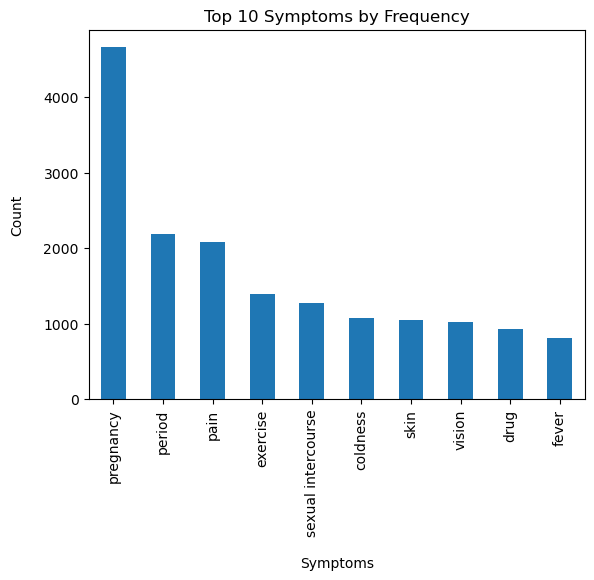

In [190]:
# Count the occurence of each symptom
all_tags = [tag for tags in df['tags'] for tag in tags]
tag_counts = pd.Series(all_tags).value_counts()

print(tag_counts)

# Select the top 10 symptoms
top_10_tags = tag_counts.head(10)

# Create bar chart
top_10_tags.plot(kind='bar')

# Add labels and title
plt.xlabel("Symptoms", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Top 10 Symptoms by Frequency")

# Show the plot
plt.show()


This plot shows us the the counts for the most commonly occuring symptoms in the dataset. It can be seen that the number of questions related to pregnancy are almost 2-4 times more than some of the other symptoms among the top 10. Further, a lot of common issues have a good number of samples in this dataset!

#### Distribution of short question length

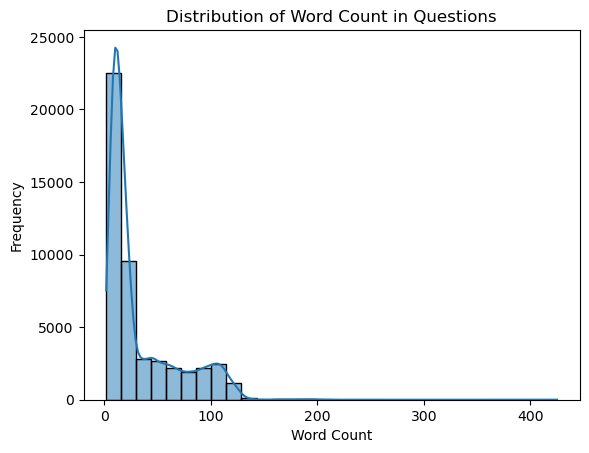

In [ ]:
# Obtain the length of each sentence, counting words by splitting on spaces
question_word_count = df['short_question'].apply(lambda x: len(x.split()))

# Create the histogram
sns.histplot(question_word_count, bins=30, kde=True)
plt.title('Distribution of Word Count in Questions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


It can be seen that most of the questions are relatively short and have a length that is under 25 words. Having a lot of short sentences is helpful since it will easy the amount of computation and make it easier to match the user queries against the questions to obtain the closest match.